# =====================================
# HR Analytics - Predict Employee Attrition
# =====================================

# HR Analytics - Employee Attrition (EDA)
# =============================

# Import libraries

In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import shap

In [3]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import eli5
from eli5.sklearn import PermutationImportance

C:\Users\singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [6]:
df = pd.read_csv("IBM-HR-Analytics-Employee-Attrition-and-Performance.csv")

# Display basic info

In [7]:
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())

Dataset Shape: (1470, 35)

Columns:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

First 5 rows:
    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequen

# Basic Data Summary

In [8]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nUnique Value Counts:\n", df.nunique())


Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole    

# Convert Attrition to numeric (Yes=1, No=0)

In [9]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Summary Statistics

In [10]:
print("\nNumerical Summary:\n", df.describe())
print("\nCategorical Summary:\n", df.describe(include=['object']))


Numerical Summary:
                Age    Attrition    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810     0.161224   802.485714          9.192517     2.912925   
std       9.135373     0.367863   403.509100          8.106864     1.024165   
min      18.000000     0.000000   102.000000          1.000000     1.000000   
25%      30.000000     0.000000   465.000000          2.000000     2.000000   
50%      36.000000     0.000000   802.000000          7.000000     3.000000   
75%      43.000000     0.000000  1157.000000         14.000000     4.000000   
max      60.000000     1.000000  1499.000000         29.000000     5.000000   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  \
count         1470.0     1470.000000              1470.000000  1470.000000   
mean             1.0     1024.865306                 2.721769    65.891156   
std              0.0      602.024

# Attrition Distribution

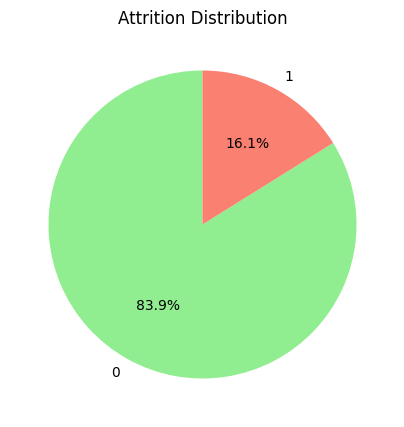

In [11]:
plt.figure(figsize=(5,5))
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen','salmon'])
plt.title("Attrition Distribution")
plt.ylabel("")
plt.savefig('Attrition Distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Attrition by Department

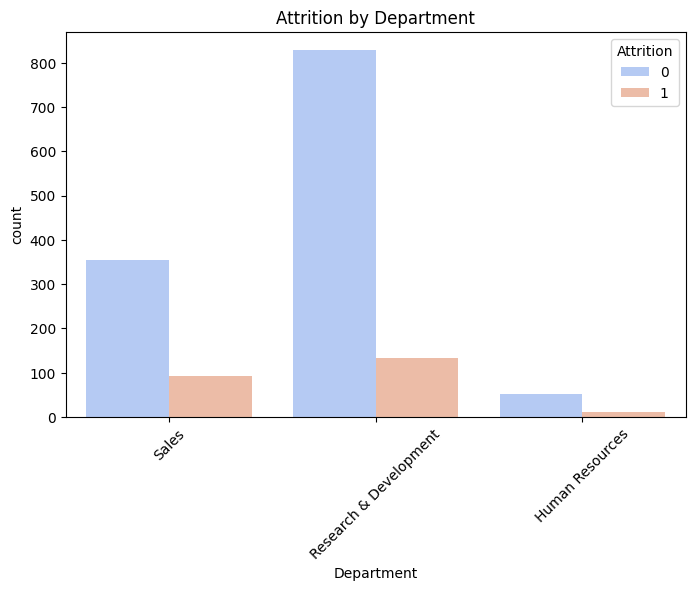

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Department', hue='Attrition', palette='coolwarm')
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.savefig('Attrition by department.png', dpi=300, bbox_inches='tight')
plt.show()

# Attrition by Gender

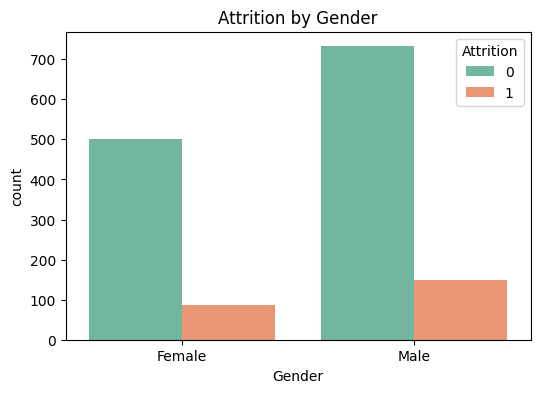

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', hue='Attrition', palette='Set2')
plt.title("Attrition by Gender")
plt.savefig('Attrition by gender.png', dpi=300, bbox_inches='tight')
plt.show()

# Age vs Attrition

C:\Users\singh\AppData\Local\Temp\ipykernel_18508\162534563.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Attrition']==0]['Age'], label='Stayed', shade=True)
C:\Users\singh\AppData\Local\Temp\ipykernel_18508\162534563.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Attrition']==1]['Age'], label='Left', shade=True)


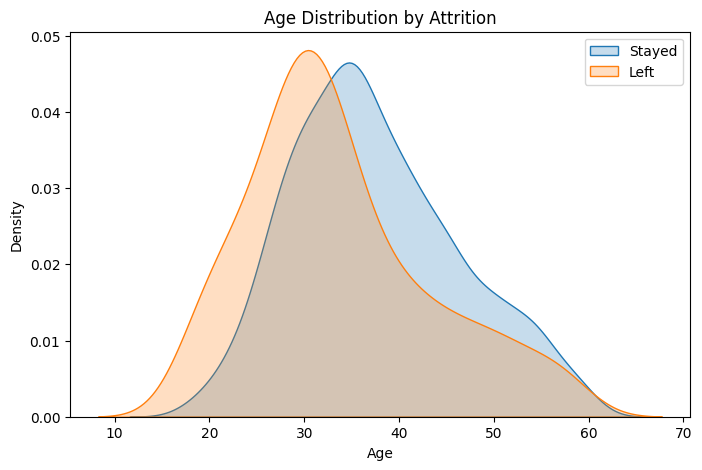

In [14]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Attrition']==0]['Age'], label='Stayed', shade=True)
sns.kdeplot(data=df[df['Attrition']==1]['Age'], label='Left', shade=True)
plt.title("Age Distribution by Attrition")
plt.xlabel("Age")
plt.legend()
plt.savefig('Age vs Attrition.png', dpi=300, bbox_inches='tight')
plt.show()

# Monthly Income vs Attrition

C:\Users\singh\AppData\Local\Temp\ipykernel_18508\1905395959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set3')


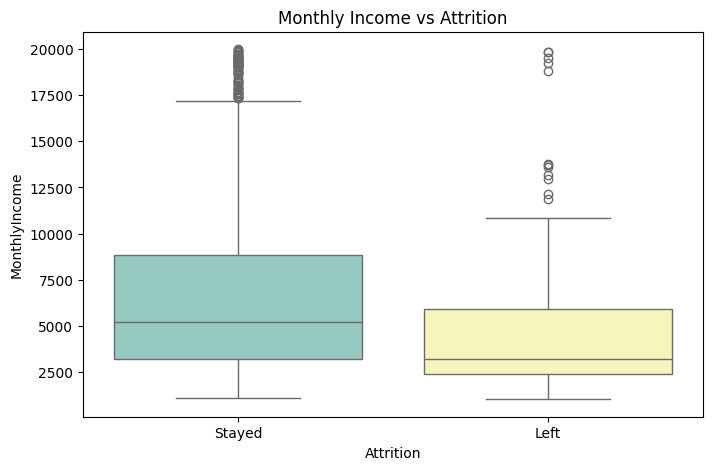

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='Set3')
plt.title("Monthly Income vs Attrition")
plt.xticks([0,1], ['Stayed','Left'])
plt.savefig('Monthly Income vs Attrition.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation Heatmap

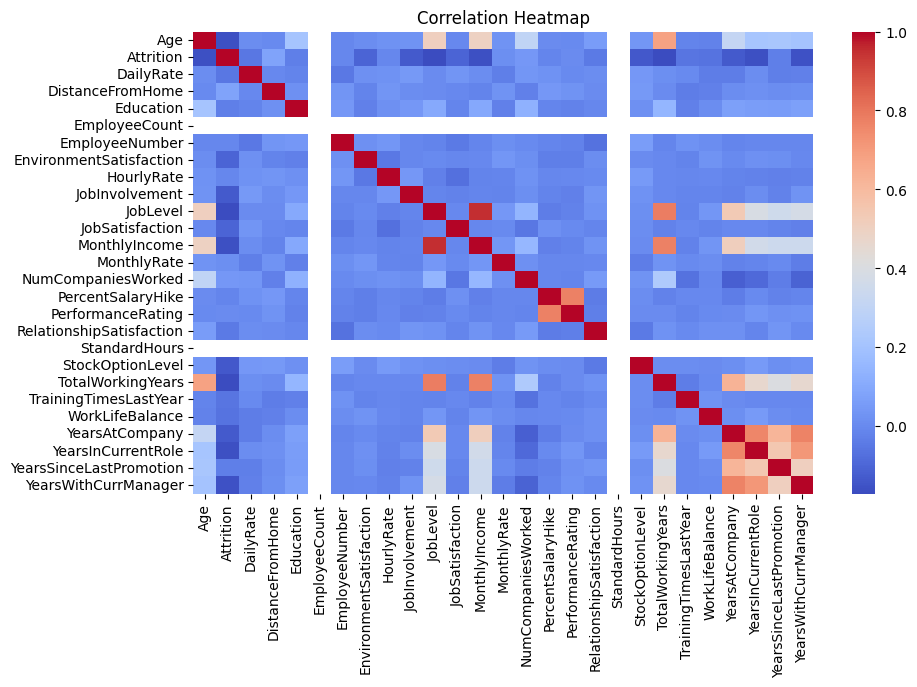

In [16]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.savefig('Correlation Heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Top Correlated Features with Attrition

In [17]:
corr_target = corr['Attrition'].sort_values(ascending=False)
print("\nTop Correlated Features with Attrition:\n", corr_target.head(10))


Top Correlated Features with Attrition:
 Attrition                  1.000000
DistanceFromHome           0.077924
NumCompaniesWorked         0.043494
MonthlyRate                0.015170
PerformanceRating          0.002889
HourlyRate                -0.006846
EmployeeNumber            -0.010577
PercentSalaryHike         -0.013478
Education                 -0.031373
YearsSinceLastPromotion   -0.033019
Name: Attrition, dtype: float64


# Department-wise Attrition

C:\Users\singh\AppData\Local\Temp\ipykernel_18508\287594368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_attrition.index, y=dept_attrition.values, palette='coolwarm')


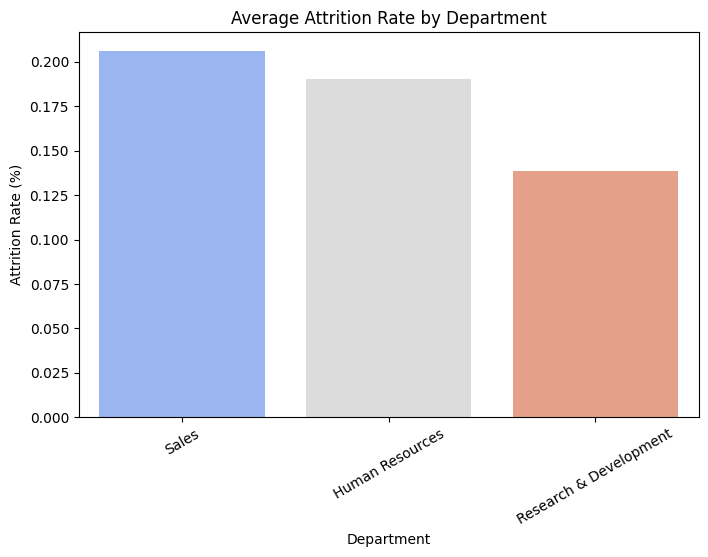

In [18]:
plt.figure(figsize=(8,5))
dept_attrition = df.groupby('Department')['Attrition'].mean().sort_values(ascending=False)
sns.barplot(x=dept_attrition.index, y=dept_attrition.values, palette='coolwarm')
plt.title("Average Attrition Rate by Department")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Department")
plt.xticks(rotation=30)
plt.savefig('Department-wise Attrition.png', dpi=300, bbox_inches='tight')
plt.show()

# Attrition by Salary Band

# Create salary bands based on MonthlyIncome

In [19]:
bins = [0, 3000, 6000, 9000, 12000, df['MonthlyIncome'].max()]
labels = ['Low', 'Lower-Mid', 'Mid', 'Upper-Mid', 'High']
df['SalaryBand'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels, include_lowest=True)

C:\Users\singh\AppData\Local\Temp\ipykernel_18508\664609997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='SalaryBand', y='Attrition', palette='magma', estimator=lambda x: 100*sum(x)/len(x))


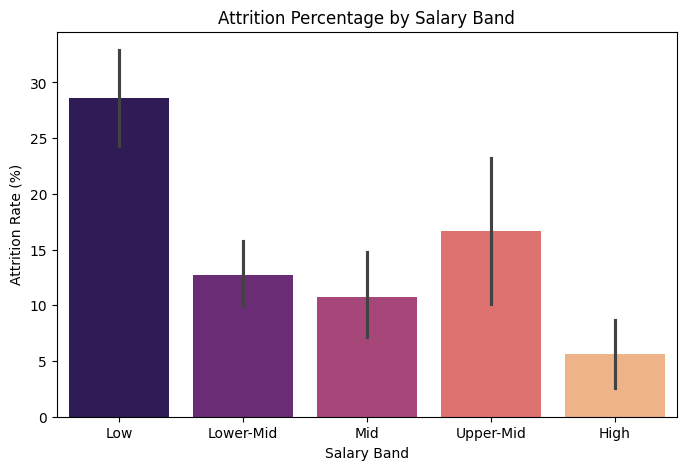

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='SalaryBand', y='Attrition', palette='magma', estimator=lambda x: 100*sum(x)/len(x))
plt.title("Attrition Percentage by Salary Band")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Salary Band")
plt.savefig('Attrition by Salary.png', dpi=300, bbox_inches='tight')
plt.show()

# Attrition by Promotion Status

C:\Users\singh\AppData\Local\Temp\ipykernel_18508\1749799342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='YearsSinceLastPromotion', y='Attrition', palette='viridis', estimator=lambda x: 100*sum(x)/len(x))


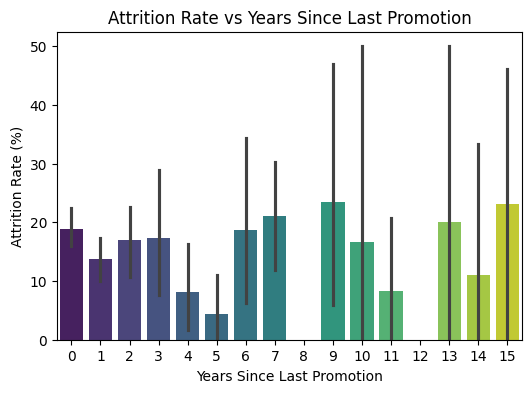

In [21]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='YearsSinceLastPromotion', y='Attrition', palette='viridis', estimator=lambda x: 100*sum(x)/len(x))
plt.title("Attrition Rate vs Years Since Last Promotion")
plt.ylabel("Attrition Rate (%)")
plt.xlabel("Years Since Last Promotion")
plt.savefig('Attrition by Promotion Status.png', dpi=300, bbox_inches='tight')
plt.show()

# Attrition by Years at Company

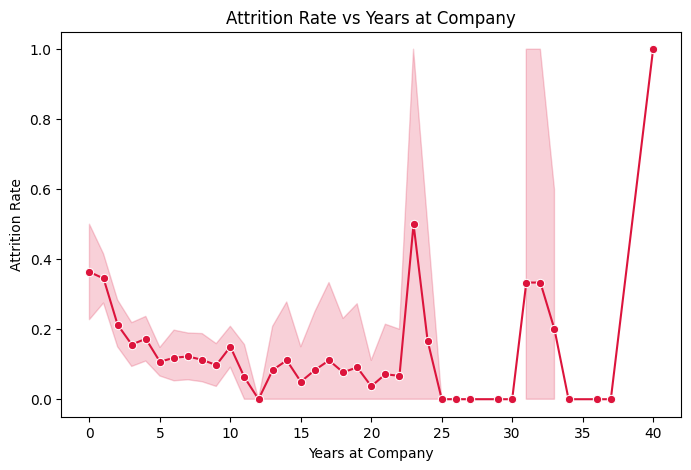

In [22]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='YearsAtCompany', y='Attrition', color='crimson', marker='o')
plt.title("Attrition Rate vs Years at Company")
plt.ylabel("Attrition Rate")
plt.xlabel("Years at Company")
plt.savefig('Attrition by Years at company.png', dpi=300, bbox_inches='tight')
plt.show()

# Is Attrition Higher in Sales?

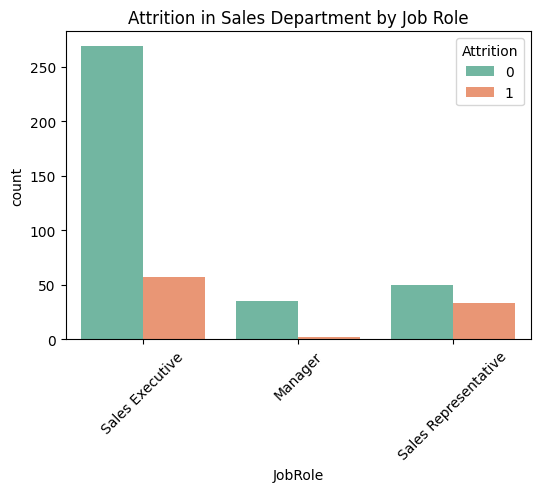

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(data=df[df['Department']=="Sales"], x='JobRole', hue='Attrition', palette='Set2')
plt.title("Attrition in Sales Department by Job Role")
plt.xticks(rotation=45)
plt.savefig('Attrition in sales.png', dpi=300, bbox_inches='tight')
plt.show()

# Do Low-Salary Employees Leave More?

C:\Users\singh\AppData\Local\Temp\ipykernel_18508\4055045939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='pastel')


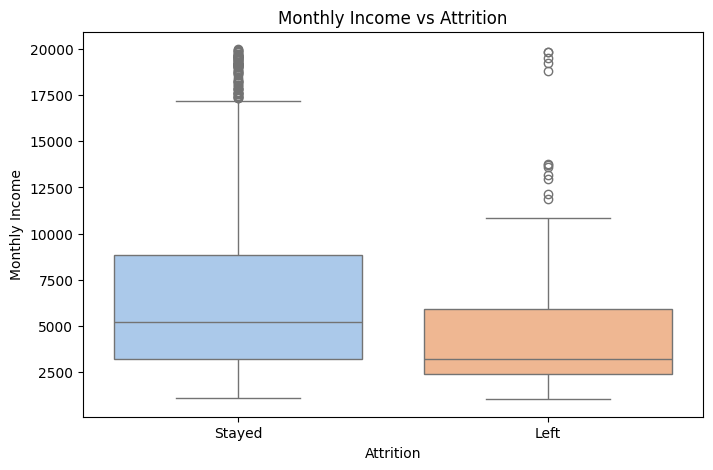

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='pastel')
plt.title("Monthly Income vs Attrition")
plt.xticks([0,1], ['Stayed','Left'])
plt.ylabel("Monthly Income")
plt.savefig('Monthly Income vs Attrition.png', dpi=300, bbox_inches='tight')
plt.show()

# ==========================================
# HR Analytics - Step: Model Building
# ==========================================

# Drop irrelevant columns

In [25]:
drop_cols = ['EmployeeCount','EmployeeNumber','Over18','StandardHours']
df = df.drop(columns=drop_cols, errors='ignore')

# Encode categorical columns

In [26]:
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Split features and target

In [27]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [28]:
print("\nColumn data types after encoding:\n", X.dtypes.value_counts())


Column data types after encoding:
 int64       30
category     1
Name: count, dtype: int64


In [29]:
if X.select_dtypes(include=['object']).shape[1] > 0:
    print("\n⚠️ Warning: Some non-numeric columns remain. Please check manually.")
else:
    print("\n✅ All features are numeric. Proceeding to scaling.")


✅ All features are numeric. Proceeding to scaling.


In [30]:
if "SalaryBand" in df.columns:
    df.drop("SalaryBand", axis=1, inplace=True)
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train–test split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# ---------------------------------------------------------
# Logistic Regression (Baseline)
# ---------------------------------------------------------

In [32]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("\n📈 Logistic Regression Metrics")
print("Accuracy :", round(accuracy_score(y_test, y_pred_log), 3))
print("Precision:", round(precision_score(y_test, y_pred_log), 3))
print("Recall   :", round(recall_score(y_test, y_pred_log), 3))
print("F1 Score :", round(f1_score(y_test, y_pred_log), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


📈 Logistic Regression Metrics
Accuracy : 0.861
Precision: 0.643
Recall   : 0.305
F1 Score : 0.414

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       309
           1       0.64      0.31      0.41        59

    accuracy                           0.86       368
   macro avg       0.76      0.64      0.67       368
weighted avg       0.84      0.86      0.84       368



# Confusion matrix

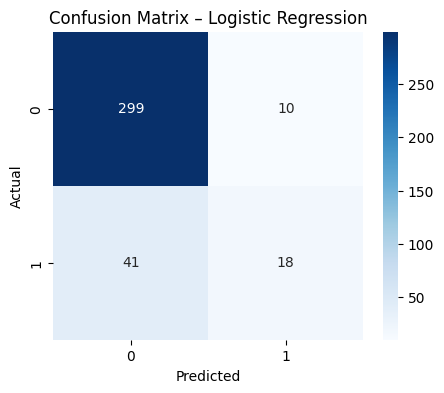

In [33]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('Confusion Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature importance (coefficients)

In [34]:
coef_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": abs(log_reg.coef_[0])
}).sort_values(by="Importance", ascending=False)
print("\nTop Predictors – Logistic Regression:\n", coef_importance.head(10))


Top Predictors – Logistic Regression:
                     Feature  Importance
18                 OverTime    0.791969
28  YearsSinceLastPromotion    0.487916
3                Department    0.477220
29     YearsWithCurrManager    0.465321
17       NumCompaniesWorked    0.458503
7   EnvironmentSatisfaction    0.437233
0                       Age    0.418723
27       YearsInCurrentRole    0.408284
13          JobSatisfaction    0.395166
23        TotalWorkingYears    0.375112


# ---------------------------------------------------------
# Decision Tree
# ---------------------------------------------------------

In [35]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\n🌳 Decision Tree Metrics")
print("Accuracy :", round(accuracy_score(y_test, y_pred_tree), 3))
print("Precision:", round(precision_score(y_test, y_pred_tree), 3))
print("Recall   :", round(recall_score(y_test, y_pred_tree), 3))
print("F1 Score :", round(f1_score(y_test, y_pred_tree), 3))


🌳 Decision Tree Metrics
Accuracy : 0.815
Precision: 0.385
Recall   : 0.254
F1 Score : 0.306


# ---------------------------------------------------------
# Random Forest
# ---------------------------------------------------------

In [36]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🌲 Random Forest Metrics")
print("Accuracy :", round(accuracy_score(y_test, y_pred_rf), 3))
print("Precision:", round(precision_score(y_test, y_pred_rf), 3))
print("Recall   :", round(recall_score(y_test, y_pred_rf), 3))
print("F1 Score :", round(f1_score(y_test, y_pred_rf), 3))


🌲 Random Forest Metrics
Accuracy : 0.84
Precision: 0.5
Recall   : 0.136
F1 Score : 0.213


# Feature importance plot

C:\Users\singh\AppData\Local\Temp\ipykernel_18508\1248900263.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_importances.head(10), x="Importance", y="Feature", palette="viridis")


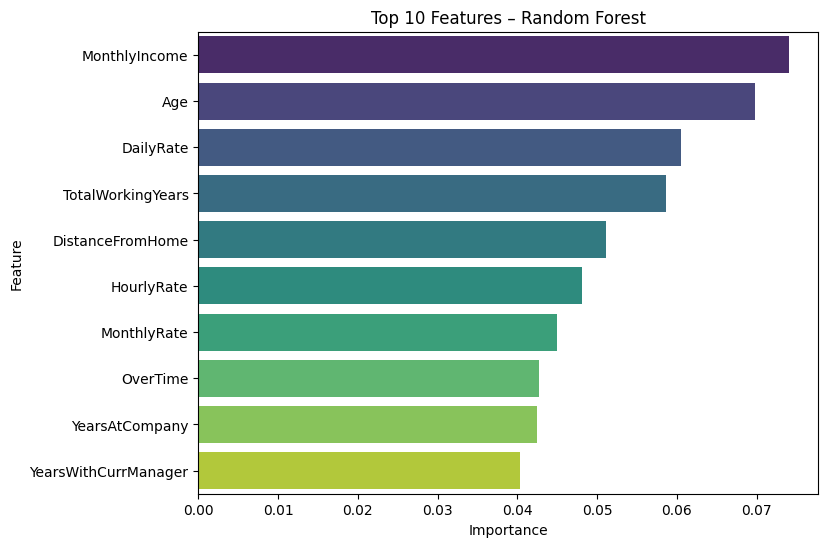

In [37]:
rf_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=rf_importances.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("Top 10 Features – Random Forest")
plt.savefig('RF_top Features.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------------------------------------------
# Model Comparison
# ---------------------------------------------------------

C:\Users\singh\AppData\Local\Temp\ipykernel_18508\1205615282.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette="coolwarm")


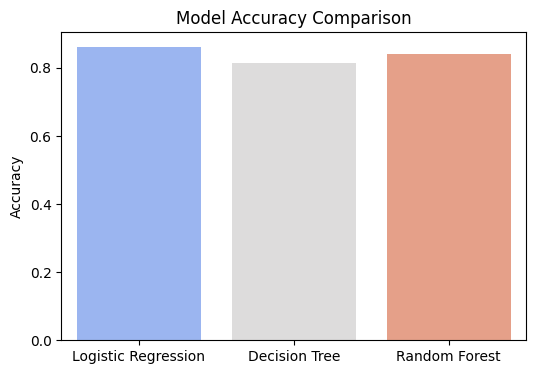

In [38]:
models = ["Logistic Regression", "Decision Tree", "Random Forest"]
accuracy = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_rf)
]
plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracy, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.savefig('Model Accuracy Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ---------------------------------------------------------
# Explainability – ELI5 Permutation Importance
# ---------------------------------------------------------

In [39]:
perm = PermutationImportance(rf_model, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X.columns.tolist(), top=10)

Weight,Feature
0.0092 ± 0.0055,MaritalStatus
0.0082 ± 0.0069,OverTime
0.0076 ± 0.0094,RelationshipSatisfaction
0.0054 ± 0.0034,EnvironmentSatisfaction
0.0049 ± 0.0022,BusinessTravel
0.0033 ± 0.0072,WorkLifeBalance
0.0022 ± 0.0041,PercentSalaryHike
0.0022 ± 0.0041,JobLevel
0.0022 ± 0.0041,EducationField
0.0022 ± 0.0022,TrainingTimesLastYear


In [40]:
print("Updated dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nSample preview after cleaning:")
print(df.head(3))

Updated dataset shape: (1470, 31)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Sample preview after cleaning:
   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   

   Education  EducationField  EnvironmentSatisfaction  